<a href="https://colab.research.google.com/github/Omaar-X/Data_Mining/blob/main/Pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diabetes Dataset From csv**

In [ ]:
import pandas as pd

# Step 1: Load dataset from GitHub (use the RAW file link, not the preview link)
url = 'https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/diabetes.csv'
data = pd.read_csv(url)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print(data.head())


Number of instances = 768
Number of attributes = 9
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Missing Value Handling**

In [ ]:
import numpy as np
data = data.replace('?',np.nan)
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of missing values:
	Pregnancies: 0
	Glucose: 0
	BloodPressure: 0
	SkinThickness: 0
	Insulin: 0
	BMI: 0
	DiabetesPedigreeFunction: 0
	Age: 0
	Outcome: 0


**Missing Value Check**

In [ ]:

missing_counts = data.isnull().sum()
print("Missing values per column:\n")
print(missing_counts)


Missing values per column:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Total Rows**

In [ ]:
print("Total rows with missing values:", data.isnull().any(axis=1).sum())


Total rows with missing values: 0


**Replace or Drop Missing Values**

In [ ]:

data = data.dropna()
data.fillna(data.mean(), inplace=True)


**Find Boxplot**

<Axes: >

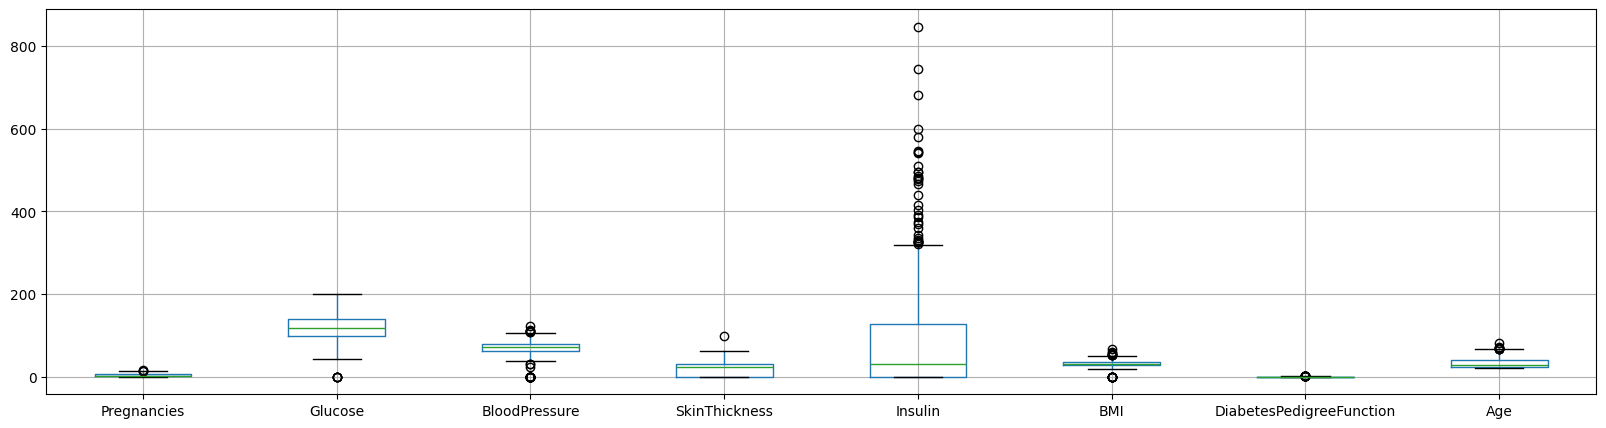

In [ ]:
%matplotlib inline

data2 = data.drop(['Outcome'],axis=1)
data2.boxplot(figsize=(20,5))


**Detect outliers using the Z-score method**

In [ ]:
Z = (data2-data2.mean())/data2.std()
Z[222:250]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
222,0.936304,-0.059255,-3.570271,-1.287373,-0.692439,-0.861547,-0.793401,0.319646
223,0.936304,0.660111,-0.470426,0.781305,0.956236,-0.404936,0.649276,2.360422
224,-0.844335,-0.653513,-0.160441,-0.347065,-0.206514,-1.064486,0.585895,-0.615709
225,-0.844335,-1.060111,0.459528,0.405181,-0.414768,0.330716,-1.119361,-0.955839
226,-1.141108,-0.622237,0.356200,-1.287373,-0.692439,0.470237,-0.826600,-0.615709
227,-0.250789,1.285646,-0.883738,1.094741,-0.692439,0.660492,0.543641,-0.785774
228,0.045984,2.380333,0.046215,1.157428,5.763428,0.597073,5.605081,-0.190548
229,-1.141108,-0.121808,0.562856,0.655930,-0.232546,1.675184,-1.155579,-0.785774
230,0.045984,0.660111,0.872840,-1.287373,-0.692439,1.522980,0.522514,-0.955839
231,0.639530,0.409897,0.562856,1.032053,2.518140,1.802021,-0.705874,1.084937


**The following code shows the results of discarding columns with Z > 4 or Z <= -3.5**

In [ ]:
print('Number of rows before discarding outliers = %d' % (Z.shape[0]))

Z2 = Z.loc[((Z > -3.5).sum(axis=1) == 8) & ((Z <= 4.0).sum(axis=1) == 8), :]
print('Number of rows after discarding outliers = %d' % (Z2.shape[0]))


Number of rows before discarding outliers = 768
Number of rows after discarding outliers = 710
